In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from scipy.stats import laplace

In [234]:
param_files = ["exp_params.txt", "pair_params.txt", "peptide_params.txt"]
params = {}
for pf in param_files:
    #pfp = os.path.join("/gd/Slavov_Lab/Albert/RTLib_Alignments/FP17_20180506_mu_norm_1", pf)
    pfp = os.path.join("/Users/albert/git/RTLib/Alignments/NCE_20180520_4", pf)
    if os.path.exists(pfp):
      with open(pfp, "rb") as f:
        try:
          params[pf.split("_")[0]] = pd.read_csv(pfp, sep="\t")
        except:
          print("some error")
params

{'exp':        beta_0    beta_1    beta_2  sigma_intercept  sigma_slope  split_point  \
 0    1.881965  0.818098  0.955235         0.278664     0.120735    31.414612   
 1    1.489315  0.829952  0.953239         0.290072     0.121988    31.866111   
 2    1.597334  0.824923  0.951726         0.269480     0.124298    31.342772   
 3    1.474790  0.830328  0.947699         0.175551     0.108913    31.550183   
 4    1.845190  0.813361  0.951222         0.191624     0.145617    31.366281   
 5    1.788994  0.811925  0.951662         0.117673     0.112032    31.211386   
 6    2.101892  0.800266  0.960568         0.331951     0.169495    32.256530   
 7    1.747857  0.819368  0.951432         0.164045     0.130111    31.086839   
 8    1.466649  0.831976  0.952489         0.245614     0.153747    31.426742   
 9    1.106621  0.842570  0.953856         0.314957     0.136920    31.735593   
 10   1.364790  0.834256  0.956311         0.217023     0.165429    31.493711   
 11   1.956083  0.808

In [19]:
#dfa = pd.read_csv('./../dat/ev.IFN_c.txt', sep='\t')
dfa = pd.read_csv('./../dat/ev_nce_c_1.txt', sep='\t')
#dfa = pd.read_csv("/gd/SingleCell_Data/FP17/evidence_c.txt", sep="\t")
dfa

,sequence,raw_file,retention_time,pep,exclude,input_id,id,exp_id,peptide_id
0,_AAAAAAGAGNRAAVAVAVAR_,180301S_QC_SQC55D,27.8270,2.438300e-01,True,0,0,3,0
1,_AAAAAAGAGNRAAVAVAVAR_,180301S_QC_SQC55E,27.6960,2.493000e-01,True,0,1,4,0
2,_AAAAAAGAGNRAAVAVAVAR_,180301S_QC_SQC55F,27.6390,2.493000e-01,True,0,2,5,0
3,_AAAAAAGAGNRAAVAVAVAR_,180301S_QC_SQC55G,27.4780,2.493000e-01,True,0,3,6,0
4,_AAAAAAGAGNRAAVAVAVAR_,180301S_QC_SQC55H,27.8360,3.805700e-01,True,0,4,7,0
5,_AAAAAAGAGNRAAVAVAVAR_,180301S_QC_SQC57A,23.8220,9.898900e-02,False,1,25814,14,0
6,_AAAAAAGAGNRAAVAVAVAR_,180301S_QC_SQC57B,23.7750,3.784200e-01,False,1,25815,15,0
7,_AAAAAAGAGNRAAVAVAVAR_,180301S_QC_SQC57E,23.8680,2.239900e-01,False,1,25816,18,0
8,_AAAAAAGAGNRAAVAVAVAR_,180301S_QC_SQC57F,23.8620,1.727400e-01,False,1,25817,19,0
9,_AAAAAAGAGNRAAVAVAVAR_,180301S_QC_SQC57G,23.8870,1.676700e-01,False,1,25818,20,0


In [26]:
dff = dfa[-(dfa["exclude"])]
dff = dff.reset_index(drop=True)

# factorize experiments into exp_id
#eidx = dff["raw_file"].unique()
#print(len(eidx))
#dff["exp_id"] = dff["raw_file"].map({ind: val for val, ind in enumerate(dff["raw_file"].unique())})

# factorize sequence into peptide_id
#dff["stan_peptide_id"] = dff["sequence"].map({ind: val for val, ind in enumerate(dff["sequence"].unique())})

num_experiments = dff["exp_id"].max() + 1
num_observations = dff.shape[0]
num_peptides = dff["peptide_id"].max() + 1
retention_times = dff["retention_time"]
pep = dff["pep"]
stan_peptide_id = dff["peptide_id"]
exp_id = dff["exp_id"]
exp_names = eidx
mean_log_rt = np.mean(np.log(retention_times))
sd_log_rt = np.std(np.log(retention_times))
max_rt = retention_times.max()

pep_exp_all = dff["peptide_id"].map(str) + " - " + dff["exp_id"].map(str)
pep_exp_pairs = pep_exp_all.unique()
num_pep_exp_pairs = len(pep_exp_pairs)
print(len(pep_exp_all))
print(len(pep_exp_all.unique()))
muij_map = pep_exp_all.map({ind: val for val, ind in enumerate(pep_exp_pairs)})
#muij_map
#dff

52428
48253


In [103]:
sm = dfa.groupby(["exp_id", "peptide_id"])["retention_time"].apply(lambda x: np.ptp(x))
sm

exp_id  peptide_id
0       1             0.000
        2             0.000
        4             0.000
        8             0.000
        9             0.000
        10            0.000
        13            0.000
        14            0.000
        23            0.000
        24            0.000
        25            0.000
        26            0.000
        28            0.000
        30            0.000
        41            0.001
        42            0.000
        43            0.036
        57            0.000
        58            0.000
        59            0.000
        63            0.000
        64            0.003
        65            0.000
        67            0.000
        68            0.000
        72            0.000
        75            0.000
        84            0.000
        86            0.000
        87            0.000
                      ...  
52      22608         0.000
        22611         0.000
        22619         0.000
        22620         0.000
 

In [156]:
#print(sm.loc[(0, 1),])
#dir(sm.index)

max_rts = dfa.groupby(["exp_id"])["retention_time"].max().values
max_rts[sm.index.to_frame()["exp_id"].values]

temp = sm[sm > max_rts[sm.index.to_frame()["exp_id"].values] / 30].index.values

pd.Series(list(zip(dfa["exp_id"], dfa["peptide_id"]))).isin(temp).sum()
#dfa["sequence"].isin(temp)



2187

In [21]:
pep_col_code = pd.cut(dff["pep"], 10)

for exp in range(0, num_experiments):
    print("Generating Summary for Experiment", exp, "|", exp_names[exp])

    exp_params = params["exp"].iloc[exp]
    exp_indices = params["pair"]["muij_to_exp"] == exp

    muijs = params["pair"]["muij"][exp_indices].values
    #sigmas = (exp_params["sigma_slope"] / 100 * muijs) + exp_params["sigma_intercept"]
    sigmas = params["pair"]["sigma_ij"][exp_indices].values

    predicted = params["pair"]["muij"][muij_map][exp_indices[muij_map]]
    predicted_sd = params["pair"]["sigma_ij"][muij_map][exp_indices[muij_map]]


    mus = params["peptide"]["mu"][params["pair"]["muij_to_pep"][muij_map][exp_indices[muij_map]]]
    #dff["retention_time"][exp_indices[muij_map]]

    observed = retention_times.values[exp_indices[muij_map]]
    obs_peps = pep.values[exp_indices[muij_map]]
    obs_code = pep_col_code.values[exp_indices[muij_map]]
    residual = observed - predicted


    plt.subplot(221)
    plt.scatter(mus, observed, s=1, color="black")
    #plt.scatter(predicted, observed)
    plt.plot([0, exp_params["split_point"]],
             [exp_params["beta_0"], (exp_params["split_point"] * exp_params["beta_1"]) + exp_params["beta_0"]],
            color="red")
    plt.plot([exp_params["split_point"], 300], 
             [(exp_params["split_point"] * exp_params["beta_1"]) + exp_params["beta_0"], (exp_params["split_point"] * exp_params["beta_1"]) + ((300-exp_params["split_point"]) * exp_params["beta_2"]) + exp_params["beta_0"]],
            color="green")
    plt.plot(np.repeat(exp_params["split_point"], 2), [-100, 300], color="blue", linestyle="dashed")
    plt.axis([0, mus.max() + 10, exp_params["beta_0"]-10, observed.max() + 10])
    plt.title(exp_names[exp])
    plt.xlabel("Canonical RT (min)")
    plt.ylabel("Observed RT (min)")

    plt.subplot(222)
    plt.scatter(predicted, observed, color="black", s=1)
    plt.plot([0, 300], [0, 300])
    plt.plot(np.repeat(exp_params["split_point"], 2), [-100, 300], color="blue", linestyle="dashed")
    plt.axis([0, predicted.max()+10, 0, observed.max()+10])
    plt.xlabel("Predicted RT (min)")
    plt.ylabel("Observed RT (min)")

    plt.subplot(223)
    plt.scatter(predicted, residual, s=1, c=pep_col_code.cat.codes.values[exp_indices[muij_map]])
    plt.plot([0, 300], [0, 0], color="blue")
    plt.plot(np.repeat(exp_params["split_point"], 2), [-100, 300], color="blue", linestyle="dashed")
    plt.plot(predicted.values[np.argsort(predicted)], laplace.ppf(0.025, loc=0, scale=predicted_sd)[np.argsort(predicted)], color="red")
    plt.plot(predicted.values[np.argsort(predicted)], laplace.ppf(0.975, loc=0, scale=predicted_sd)[np.argsort(predicted)], color="red")
    plt.axis([predicted.min()-5, predicted.max()+5, residual.min()-5, residual.max()+5])
    cbar = plt.colorbar()
    cbar.ax.set_yticklabels(pep_col_code.cat.categories.values)
    plt.xlabel("Predicted RT (min)")
    plt.ylabel("Residual RT (min)")

    plt.subplots_adjust(hspace=0.3, wspace=0.3)


    fig = plt.gcf()
    fig.set_size_inches(7, 7)
    fname = "./tmp_figs/alignment_" + str(exp) + "_" + exp_names[exp] + ".png"
    print("Saving figure to", fname, "...")
    fig.savefig(fname, dpi=160)
    
    plt.close()
    fig.clf()

Generating Summary for Experiment 0 | 180301S_QC_SQC57A


/Users/albert/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:696: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


ValueError: cannot index with vector containing NA / NaN values

In [7]:
from scipy.stats import laplace

In [8]:
laplace.ppf([0.05, 0.5, 0.95])
#print(len(laplace.ppf(0.025, loc=0, scale=predicted_sd)[np.argsort(predicted)]))
#print(len(predicted.values[np.argsort(predicted)]))
#predicted

array([-2.30258509,  0.        ,  2.30258509])

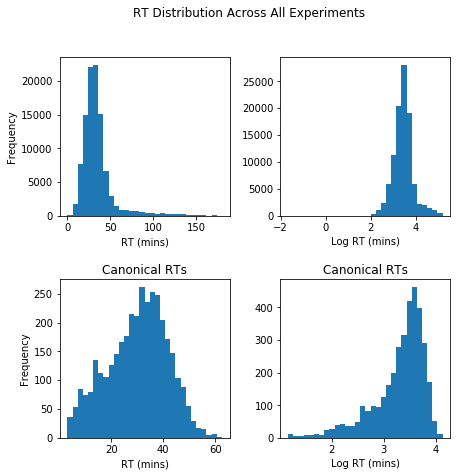

In [27]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.hist(dfa["retention_time"], bins=30)
ax1.set(xlabel="RT (mins)", ylabel="Frequency")

ax2.hist(np.log(dfa["retention_time"]), bins=30)
ax2.set(xlabel="Log RT (mins)")

ax3.hist(params["peptide"]["mu"], bins=30)
ax3.set(xlabel="RT (mins)", ylabel="Frequency", title="Canonical RTs")
ax4.hist(np.log(params["peptide"]["mu"]), bins=30)
ax4.set(xlabel="Log RT (mins)", title="Canonical RTs")

f.suptitle("RT Distribution Across All Experiments")

plt.subplots_adjust(hspace=0.4, wspace=0.3)

fig = plt.gcf()
fig.set_size_inches(7, 7)

plt.show()
f.clf()

In [236]:
dff
muij_map

0            0
1            1
2            2
3            3
4            4
5            5
6            6
7            7
8            8
9            9
10          10
11          11
12          12
13          13
14          14
15          15
16          16
17          17
18          18
19          19
20          20
21          21
22          22
23          23
24          24
25          25
26          26
27          27
28          28
29          29
         ...  
52398    48225
52399    48226
52400    48227
52401    48228
52402    48228
52403    48229
52404    48230
52405    48230
52406    48231
52407    48232
52408    48233
52409    48234
52410    48235
52411    48236
52412    48237
52413    48238
52414    48239
52415    48240
52416    48241
52417    48242
52418    48243
52419    48244
52420    48245
52421    48246
52422    48247
52423    48248
52424    48249
52425    48250
52426    48251
52427    48252
Length: 52428, dtype: int64

/Users/albert/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:696: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


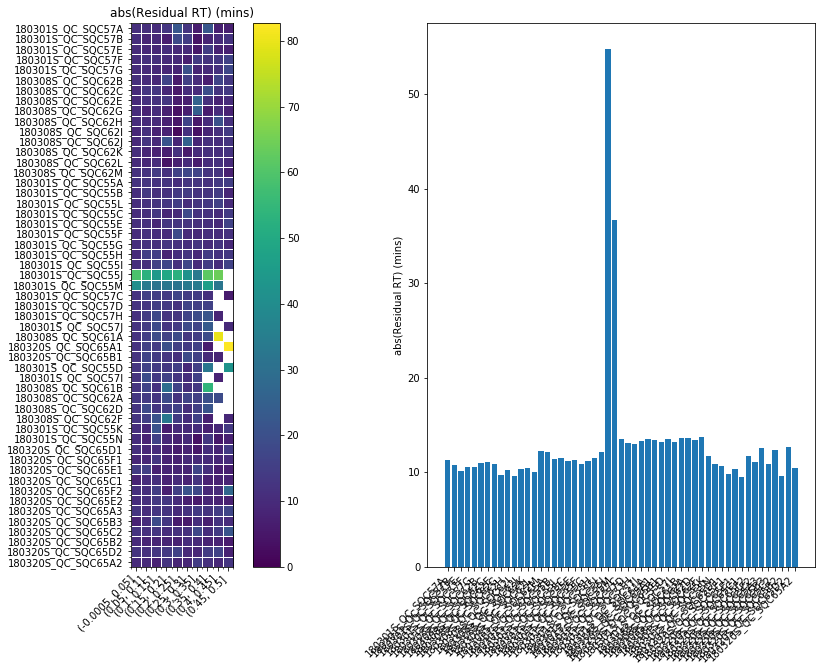

In [28]:
cuts = 10

exp_names = dff["raw_file"].unique()

dff["muij"] = params["pair"]["muij"][muij_map].values
dff["pep_col_code"] = pd.cut(dff["pep"], cuts)
dff["residual"] = dff["retention_time"] - dff["muij"]
dff["abs_residual"] = np.abs(dff["residual"])
dff["residual_sq"] = pow(dff["residual"], 2)

#res = dff.groupby(["exp_id", "pep_col_code"])["abs_residual"].mean()
res = np.ones((num_experiments, 10))
for i in range(0, num_experiments):
    for j in range(0, cuts):
        desi = dff["abs_residual"][(dff["exp_id"] == i) & (dff["pep_col_code"].cat.codes == j)]
        if len(desi) == 0:
            res[i][j] = np.nan
        else:
            res[i][j] = np.nanmean(desi.values)

res_map = res

f, (ax1, ax2) = plt.subplots(1, 2)

mp = ax1.imshow(res_map, interpolation="nearest", vmin=0)
plt.colorbar(mp, ax=ax1)

ax1.set_xticks(np.arange(-.5, cuts, 1))
# Major ticks
ax1.set_xticks(np.arange(0, cuts, 1));
ax1.set_yticks(np.arange(0, len(exp_names), 1));
# Labels for major ticks
ax1.set_xticklabels(dff["pep_col_code"].cat.categories.to_series(), rotation=45, ha="right")
ax1.set_yticklabels(exp_names);
# Minor ticks
ax1.set_xticks(np.arange(-.5, cuts, 1), minor=True);
ax1.set_yticks(np.arange(-.5, len(exp_names), 1), minor=True);
# Gridlines based on minor ticks
ax1.grid(which='minor', color='w', linestyle='-', linewidth=1)
ax1.set(title="abs(Residual RT) (mins)")

res_bars = dff.groupby(["exp_id"])["abs_residual"].mean()
ax2.bar(range(0, num_experiments), res_bars.values)
ax2.set_xticks(np.arange(0, num_experiments, 1))
ax2.set_xticklabels(exp_names, rotation=45, ha="right")
ax2.set(ylabel="abs(Residual RT) (mins)")

plt.subplots_adjust(hspace=0.3, wspace=0.3)

fig = plt.gcf()
fig.set_size_inches(16, 10)

plt.show()
fig.clf()

/Users/albert/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


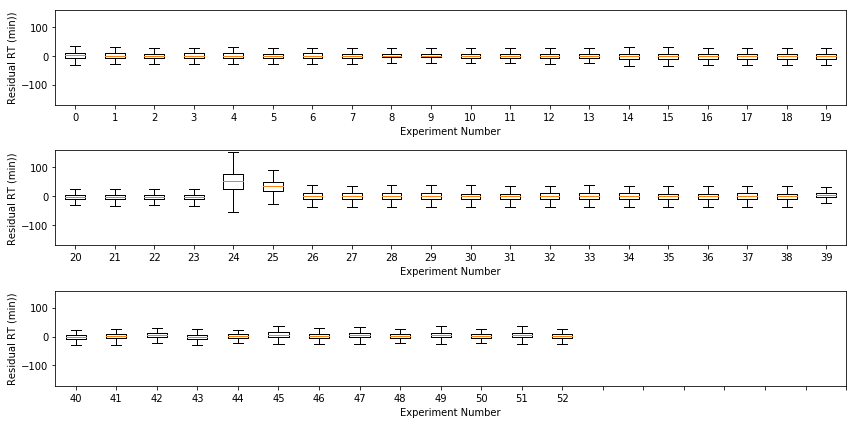

In [297]:
exp_names = dff["raw_file"].unique()

#res = dff.groupby("exp_id")["residual"].apply(lambda x: x[~pd.isnull(x)].values.tolist()).values.tolist()
#res = dff.groupby("exp_id")["residual"].apply(lambda x: x[~pd.isnull(x)])
#res = np.log(res)

plots_per_row = 20
num_rows = int(np.ceil(num_experiments/plots_per_row))

#f, axes = plt.subplots(num_rows, 1)
#f, ax = plt.subplots()

resi = []

for i in range(0, num_rows):
    ax = plt.subplot2grid((num_rows, 1), (i, 0))
    
    if (i+1)*plots_per_row > num_experiments:
        #resi = res.loc[(i*plots_per_row):num_experiments]
        resi = [dff["residual"][(dff["exp_id"]==i) & (~pd.isnull(dff["residual"]))] for i in range((i*plots_per_row), num_experiments)]
        ax.boxplot(resi, showfliers=False)
        ax.set_xticklabels(np.arange((i*plots_per_row), num_experiments, 1))
    else:
        #resi = res.loc[(i*plots_per_row):((i+1)*plots_per_row)]
        resi = [dff["residual"][(dff["exp_id"]==i) & (~pd.isnull(dff["residual"]))] for i in range((i*plots_per_row), ((i+1)*plots_per_row))]
        ax.boxplot(resi, showfliers=False)
        ax.set_xticklabels(np.arange((i*plots_per_row), ((i+1)*plots_per_row), 1))
        
    #ax.violinplot(resi, showmedians=True, showextrema=True)
    
    ax.set_xticks(np.arange(1, plots_per_row+1, 1))
    ax.set_ylim(np.min(dff["residual"])-5, np.max(dff["residual"])+5)
    
    ax.set_xlabel("Experiment Number")
    ax.set_ylabel("Residual RT (min))")
    
#ax = plt.subplot2grid((num_rows, 2), (0, 1), rowspan=num_rows)
#ax.table(cellText=[[x] for x in exp_names], loc="center", colLabels=["1"], fontsize=3)
#ax.set_axis_off()
    
#plt.subplots_adjust(hspace=0.4, wspace=0.3)

f = plt.gcf()
#f.text(0.5, 0, 'Experiment Number', fontsize=16, ha='center', va='center')
#f.text(0.06, 0.5, 'Residual RT (min)', fontsize=16, ha='center', va='center', rotation='vertical')
f.set_size_inches(12, num_rows*2)
plt.tight_layout()

"""
f, ax = plt.subplots()
ax.violinplot(res)
ax.set_xticks(np.arange(1, num_experiments+1, 1))
ax.set_xticklabels(exp_names, rotation=60, ha="right")
ax.set_xlim(0, num_experiments+1)
f.set_size_inches(15, 6)
plt.show()
"""

plt.show()

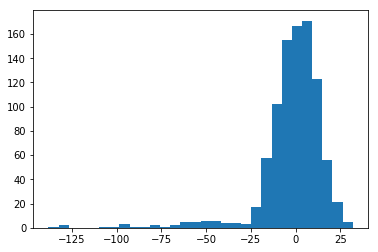

In [283]:
sd = dff.groupby("exp_id")["residual"].apply(np.nanstd)
med = dff.groupby("exp_id")["residual"].apply(np.nanmedian)

np.sum(np.abs(dff["residual"] - med) > (sd[dff["exp_id"]] * 0.5).values)

plt.hist(dff["residual"][dff["exp_id"]==0], bins=30)
plt.show()
